In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import torch.optim as optim
from torch import nn
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from utils import ProcessedDataDataset, Model, Model2, Trainer, train_val_test_split_indices, evaluate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [10]:
data_raw = pkl.load(open('processed_final_2.pkl', 'rb'))

In [41]:
for i, (key, val) in enumerate(data_raw.items()):
    if i==0:
        print(key, val)

PN_MCKVEQNTJFRUHOURCR2HCEB35KDFRETL {'atoms': Atoms(symbols='Ni4Ta6', pbc=False, cell=[[-6.910143, 0.0, 0.0], [3.4550720000000004, -5.984361000000001, 0.0], [-3.4550720000000004, 1.994788, 3.8393110000000004]]), 'descriptor': array([[-0.00350969,  0.00261504,  0.07132949, ..., -0.04078352,
         0.03378838, -0.04476274],
       [-0.00350969,  0.00261504,  0.07132949, ..., -0.04078352,
         0.03378838, -0.04476274],
       [-0.00350969,  0.00261504,  0.07132949, ..., -0.04078352,
         0.03378838, -0.04476274],
       ...,
       [-0.20447813, -0.21743864,  0.12225066, ..., -0.10712977,
         0.11042746, -0.01171004],
       [-0.20447813, -0.21743864,  0.12225066, ..., -0.10712977,
         0.11042746, -0.01171004],
       [-0.20447813, -0.21743864,  0.12225066, ..., -0.10712977,
         0.11042746, -0.01171004]], dtype=float32), 'descriptor_2': array([0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
data_raw["PN_MCKVEQNTJFRUHOURCR2HCEB35KDFRETL"]

{'atoms': Atoms(symbols='Ni4Ta6', pbc=False, cell=[[-6.910143, 0.0, 0.0], [3.4550720000000004, -5.984361000000001, 0.0], [-3.4550720000000004, 1.994788, 3.8393110000000004]]),
 'descriptor': array([[-0.00350969,  0.00261504,  0.07132949, ..., -0.04078352,
          0.03378838, -0.04476274],
        [-0.00350969,  0.00261504,  0.07132949, ..., -0.04078352,
          0.03378838, -0.04476274],
        [-0.00350969,  0.00261504,  0.07132949, ..., -0.04078352,
          0.03378838, -0.04476274],
        ...,
        [-0.20447813, -0.21743864,  0.12225066, ..., -0.10712977,
          0.11042746, -0.01171004],
        [-0.20447813, -0.21743864,  0.12225066, ..., -0.10712977,
          0.11042746, -0.01171004],
        [-0.20447813, -0.21743864,  0.12225066, ..., -0.10712977,
          0.11042746, -0.01171004]], dtype=float32),
 'descriptor_2': array([0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.      

In [11]:

# Instantiate the dataset
dataset = ProcessedDataDataset(data_raw)

train_indices, val_indices, test_indices = train_val_test_split_indices(range(len(dataset)),train_size=0.7, val_size=0.15, test_size=0.15, random_seed=42)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# DataLoaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [27]:
model = Model()
model2 = Model2()
criterion = nn.MSELoss()  # Assuming regression task
optimizer = optim.Adam(model.parameters(), lr=0.0001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.0001)

In [34]:
trainer = Trainer(model, train_loader, val_loader, criterion, optimizer, device='cuda' if torch.cuda.is_available() else 'cpu')
loss_bin = trainer.train(num_epochs=50)

trainer_2 = Trainer(model2, train_loader, val_loader, criterion, optimizer2, device='cuda' if torch.cuda.is_available() else 'cpu')
loss_bin_2 = trainer_2.train(num_epochs=50)

Epoch [1/50], Loss: 0.1588
val Loss after Epoch [1/50]: 0.2708
Epoch [2/50], Loss: 0.1615
val Loss after Epoch [2/50]: 0.2708
Epoch [3/50], Loss: 0.1620
val Loss after Epoch [3/50]: 0.2814
Epoch [4/50], Loss: 0.1593
val Loss after Epoch [4/50]: 0.2758
Epoch [5/50], Loss: 0.1608
val Loss after Epoch [5/50]: 0.2726
Epoch [6/50], Loss: 0.1593
val Loss after Epoch [6/50]: 0.2783
Epoch [7/50], Loss: 0.1580
val Loss after Epoch [7/50]: 0.2774
Epoch [8/50], Loss: 0.1590
val Loss after Epoch [8/50]: 0.2708
Epoch [9/50], Loss: 0.1593
val Loss after Epoch [9/50]: 0.2789
Epoch [10/50], Loss: 0.1569
val Loss after Epoch [10/50]: 0.2739
Epoch [11/50], Loss: 0.1594
val Loss after Epoch [11/50]: 0.2713
Epoch [12/50], Loss: 0.1554
val Loss after Epoch [12/50]: 0.2740
Epoch [13/50], Loss: 0.1557
val Loss after Epoch [13/50]: 0.2805
Epoch [14/50], Loss: 0.1563
val Loss after Epoch [14/50]: 0.2720
Epoch [15/50], Loss: 0.1565
val Loss after Epoch [15/50]: 0.2782
Epoch [16/50], Loss: 0.1566
val Loss after 

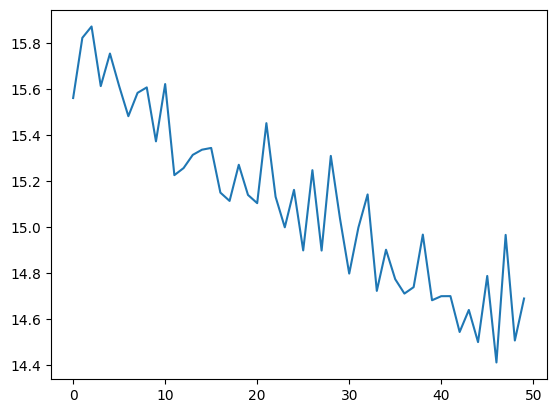

In [36]:
plt.plot(np.arange(len(loss_bin)), loss_bin)

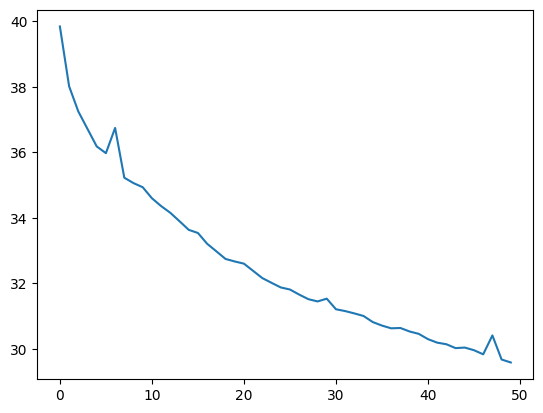

In [37]:
plt.plot(np.arange(len(loss_bin_2)), loss_bin_2)

Text(0, 0.5, 'Target (eV/atom)')

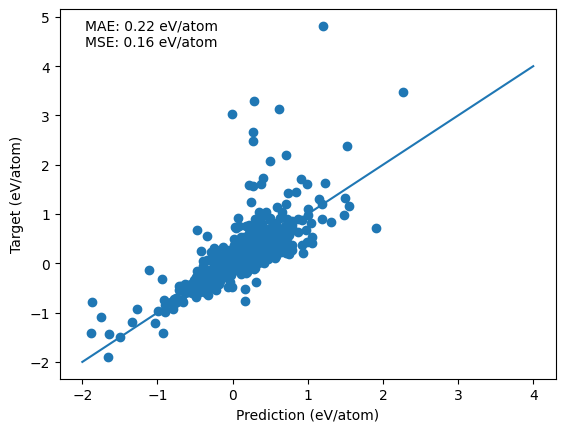

In [38]:
pred_list, targ_list = evaluate(model, test_loader, "cpu")
mse = mean_squared_error(pred_list, targ_list)
mae = mean_absolute_error(pred_list, targ_list)
r2 =  r2_score(pred_list, targ_list)
plt.scatter(pred_list, targ_list)
plt.plot(np.arange(-2,5), np.arange(-2,5))
# Add annotation with the correct position for MAE
plt.annotate(f"MAE: {mae:.2f} eV/atom\nMSE: {mse:.2f} eV/atom", xy=(0.05, 0.9), xycoords='axes fraction')

# plt.annotate(f"MAE: {mae:.2f} eV/atom")
# plt.annotate(f"MAE: {mae:.2f} eV/atom")
plt.xlabel("Prediction (eV/atom)")
plt.ylabel("Target (eV/atom)")

Text(0, 0.5, 'Target (eV/atom)')

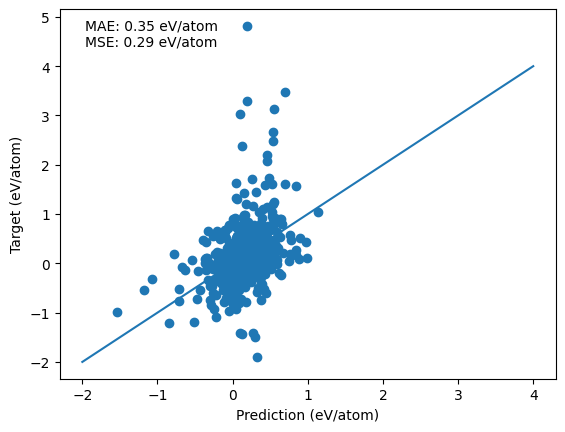

In [39]:
pred_list_2, targ_list_2 = evaluate(model2, test_loader, "cpu")
mse_2 = mean_squared_error(pred_list_2, targ_list_2)
mae_2 = mean_absolute_error(pred_list_2, targ_list_2)
r2_2 =  r2_score(pred_list_2, targ_list_2)
plt.scatter(pred_list_2, targ_list_2)
plt.plot(np.arange(-2,5), np.arange(-2,5))
# Add annotation with the correct position for MAE
plt.annotate(f"MAE: {mae_2:.2f} eV/atom\nMSE: {mse_2:.2f} eV/atom", xy=(0.05, 0.9), xycoords='axes fraction')

# plt.annotate(f"MAE: {mae:.2f} eV/atom")
# plt.annotate(f"MAE: {mae:.2f} eV/atom")
plt.xlabel("Prediction (eV/atom)")
plt.ylabel("Target (eV/atom)")